In [1]:
!pip install reportlab

   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 2.0/2.0 MB 21.7 MB/s eta 0:00:00


Total jobs fetched: 95


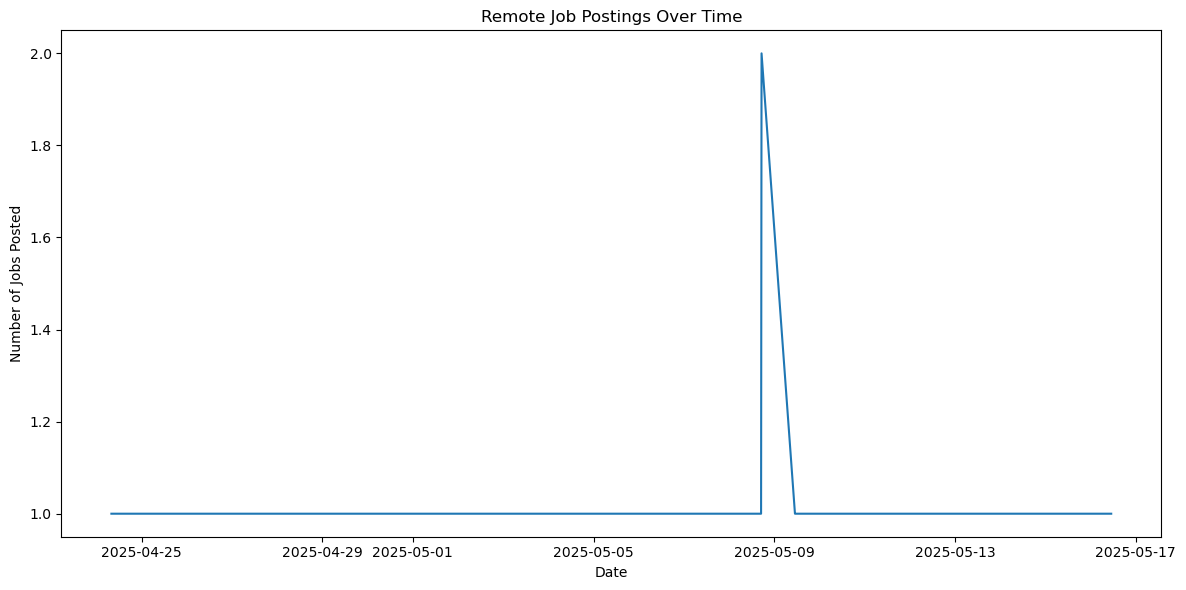

C:\Users\sofia\AppData\Local\Temp\ipykernel_11884\4051096752.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_companies.values, y=top_companies.index, palette='viridis')


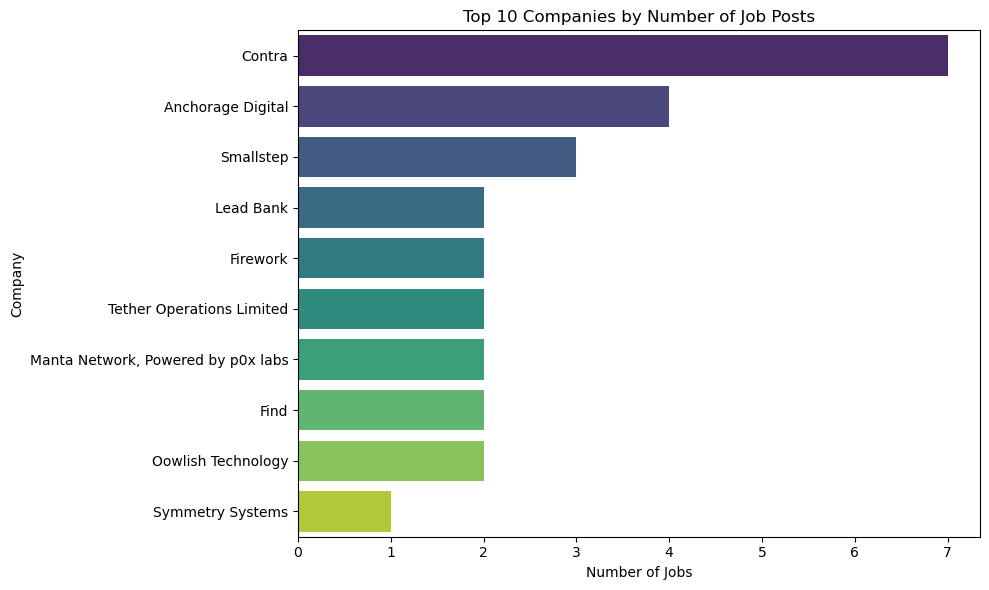

C:\Users\sofia\AppData\Local\Temp\ipykernel_11884\4051096752.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_tags.values, y=top_tags.index, palette='magma')


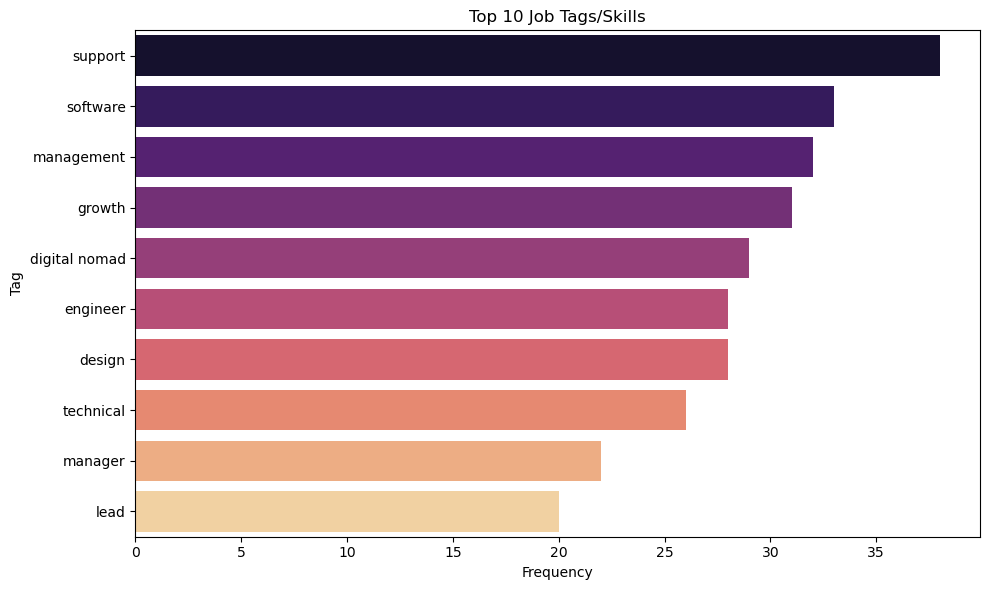

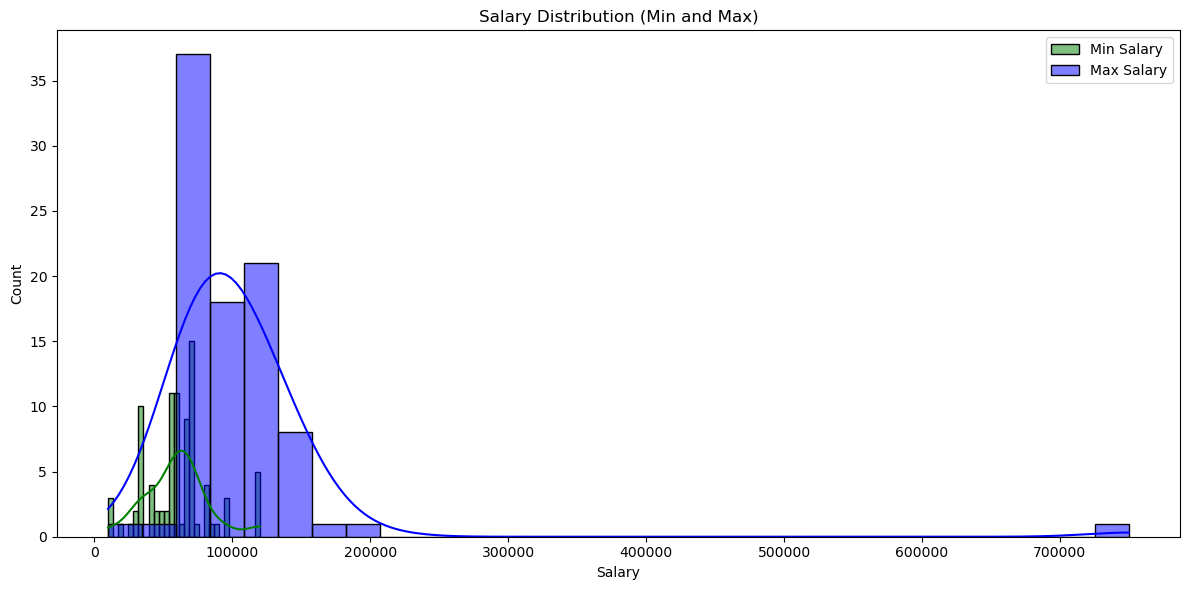

In [3]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Get job data from RemoteOK API
url = "https://remoteok.com/api"
response = requests.get(url)
data = response.json()

# Step 2: Convert to DataFrame and clean
jobs = pd.DataFrame(data[1:])  # skip metadata

# Keep relevant columns, avoid non-existing ones
columns_to_keep = [
    'date', 'company', 'position', 'location', 'tags', 
    'salary_min', 'salary_max', 'url'
]
jobs_cleaned = jobs[columns_to_keep].copy()

# Step 3: Convert date and salary columns
jobs_cleaned['date'] = pd.to_datetime(jobs_cleaned['date'], errors='coerce')
jobs_cleaned['salary_min'] = pd.to_numeric(jobs_cleaned['salary_min'], errors='coerce')
jobs_cleaned['salary_max'] = pd.to_numeric(jobs_cleaned['salary_max'], errors='coerce')

# Step 4: Basic stats
print("Total jobs fetched:", len(jobs_cleaned))

# Step 5: Jobs posted over time
jobs_per_day = jobs_cleaned.groupby('date').size().reset_index(name='job_count')

plt.figure(figsize=(12,6))
sns.lineplot(data=jobs_per_day, x='date', y='job_count')
plt.title("Remote Job Postings Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Jobs Posted")
plt.tight_layout()
plt.show()  # Force plot to appear in VS Code

# Step 6: Top companies by number of job posts
top_companies = jobs_cleaned['company'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_companies.values, y=top_companies.index, palette='viridis')
plt.title("Top 10 Companies by Number of Job Posts")
plt.xlabel("Number of Jobs")
plt.ylabel("Company")
plt.tight_layout()
plt.show()

# Step 7: Most common tags/skills
all_tags = jobs_cleaned['tags'].dropna().explode()
top_tags = all_tags.value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_tags.values, y=top_tags.index, palette='magma')
plt.title("Top 10 Job Tags/Skills")
plt.xlabel("Frequency")
plt.ylabel("Tag")
plt.tight_layout()
plt.show()

# Step 8: Salary distribution (cleaning out zeros and NaNs)
salary_data = jobs_cleaned[['salary_min', 'salary_max']].dropna()
salary_data = salary_data[(salary_data['salary_min'] > 0) & (salary_data['salary_max'] > 0)]

plt.figure(figsize=(12,6))
sns.histplot(salary_data['salary_min'], bins=30, kde=True, color='green', label='Min Salary')
sns.histplot(salary_data['salary_max'], bins=30, kde=True, color='blue', label='Max Salary')
plt.title("Salary Distribution (Min and Max)")
plt.xlabel("Salary")
plt.legend()
plt.tight_layout()
plt.show()


In [4]:
print("Shape of cleaned data (rows, columns):", jobs_cleaned.shape)


Shape of cleaned data (rows, columns): (95, 8)


In [6]:
remoteok_df = pd.DataFrame(jobs)
remoteok_df.to_csv("remoteok_jobs.csv", index=False)
remoteok_df.head()

,slug,id,epoch,date,company,company_logo,position,tags,logo,description,location,salary_min,salary_max,apply_url,url,original,verified
0,remote-marketing-design-intern-2025-summer-int...,1093189,1747393210,2025-05-16T11:00:10+00:00,Symmetry Systems,https://remoteok.com/assets/img/jobs/29fd4faca...,Marketing Design Intern 2025 Summer Intern,"[design, security, technical, support, softwar...",https://remoteok.com/assets/img/jobs/29fd4faca...,"<p><span style=""font-size: 32px;"">Overview</sp...",Remote,70000,80000,https://remoteOK.com/remote-jobs/remote-market...,https://remoteOK.com/remote-jobs/remote-market...,NaN,NaN
1,remote-lifecycle-marketing-associate-blueland-...,1093188,1747393203,2025-05-16T11:00:03+00:00,Blueland,https://remoteok.com/assets/img/jobs/455eeceae...,Lifecycle Marketing Associate,"[support, growth, investment, strategy, manage...",https://remoteok.com/assets/img/jobs/455eeceae...,"<p><br></p><p><span style=""font-size: 16px;"">B...",Remote,35000,65000,https://remoteOK.com/remote-jobs/remote-lifecy...,https://remoteOK.com/remote-jobs/remote-lifecy...,NaN,NaN
2,remote-member-of-product-trading-anchorage-dig...,1093187,1747389603,2025-05-16T10:00:03+00:00,Anchorage Digital,https://remoteok.com/assets/img/jobs/5a4f89995...,Member of Product Trading,"[design, crypto, cryptocurrency, swift, securi...",https://remoteok.com/assets/img/jobs/5a4f89995...,"<p><span style=""font-size: 18px""><b>At Anchora...",United States,67500,125000,https://remoteOK.com/remote-jobs/remote-member...,https://remoteOK.com/remote-jobs/remote-member...,NaN,NaN
3,remote-associate-attorney-enablecomp-1093185,1093185,1747353606,2025-05-16T00:00:06+00:00,EnableComp,https://remoteok.com/assets/img/jobs/b14805dfc...,Associate Attorney,"[training, support, growth, financial, strateg...",https://remoteok.com/assets/img/jobs/b14805dfc...,"<p><span style=""font-size: 12pt"">EnableComp pr...",,90000,152500,https://remoteOK.com/remote-jobs/remote-associ...,https://remoteOK.com/remote-jobs/remote-associ...,NaN,NaN
4,remote-1093182,1093182,1747332001,2025-05-15T18:00:01+00:00,,,,"[sales, non tech]",,Apollo.io is an AI-powered B2B sales intellige...,,40000,67500,https://remoteOK.com/remote-jobs/remote-1093182,https://remoteOK.com/remote-jobs/remote-1093182,NaN,NaN
